In [143]:
!pip install japanize_matplotlib

In [291]:
# 必要なライブラリをインポート
from pathlib import Path
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from matplotlib.font_manager import fontManager
from google.colab import drive
# Colabにインストールされていないライブラリは!pipコマンドでインストールする
import japanize_matplotlib
sns.set(font="IPAexGothic")
from sklearn.linear_model import LogisticRegression

In [292]:
# # Google Driveをマウント
drive.mount('/content/drive')

# # csvファイルの読み込み
p = Path('./drive/MyDrive')
data_path = '**/workshop_2025/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [293]:
df_user = pd.read_csv(list(p.glob(data_path+'data/user_info.csv'))[0])
df_game = pd.read_csv(list(p.glob(data_path+'data/game_info.csv'))[0])
df_ticket = pd.read_csv(list(p.glob(data_path+'data/ticket_info.csv'))[0])
df_seat = pd.read_csv(list(p.glob(data_path+'data/seat_info.csv'))[0])
df_purchase = pd.read_csv(list(p.glob(data_path+'data/purchase_info.csv'))[0])
df_sns = pd.read_csv(list(p.glob(data_path+'data/sns_info.csv'))[0])
df_servey = pd.read_csv(list(p.glob(data_path+'data/survey_info.csv'))[0])

In [294]:
print(df_user.columns)
print(df_game.columns)
print(df_ticket.columns)
print(df_seat.columns)
print(df_purchase.columns)
print(df_sns.columns)
print(df_servey.columns)

Index(['システムID', '年齢', '性別', '都道府県', '市区町村', 'FC', 'SNS'], dtype='object')
Index(['イベント開催日', '曜日', '天気', '開催時間', '対戦相手', 'イベント名'], dtype='object')
Index(['システムID', 'イベント名', '座種'], dtype='object')
Index(['座種', '価格', '座席数'], dtype='object')
Index(['システムID', '購入カテゴリ', '購入金額', '購入日', '購入時間'], dtype='object')
Index(['ポストした日', 'ポスト内容', 'フォロワー数', 'いいね数', 'シェア数', 'インプレッション数', 'クリック数'], dtype='object')
Index(['システムID', 'アリーナの清潔感', '従業員の対応', '商品', 'フードの質', '席の快適感', 'チケットの値段',
       'イベント内容', 'アリーナの案内', '交通', '全体の満足度'],
      dtype='object')


In [301]:
df_seat

,座種,価格,座席数
0,アリーナA,6000,3000
1,アリーナB,4000,1500
2,バルコニー,2000,1000
3,コートサイド,12000,800
4,アリーナC,3000,800
5,テーブルシート,8000,400
6,立ち見,1000,500


In [295]:
print(df_user.isnull().sum())
print(df_game.isnull().sum())
print(df_ticket.isnull().sum())
print(df_seat.isnull().sum())
print(df_purchase.isnull().sum())
print(df_sns.isnull().sum())
print(df_servey.isnull().sum())

システムID     0
年齢         0
性別         0
都道府県       0
市区町村      14
FC         0
SNS        0
dtype: int64
イベント開催日    0
曜日         0
天気         0
開催時間       0
対戦相手       0
イベント名      0
dtype: int64
システムID    0
イベント名     0
座種        0
dtype: int64
座種     0
価格     0
座席数    0
dtype: int64
システムID    0
購入カテゴリ    0
購入金額      0
購入日       0
購入時間      0
dtype: int64
ポストした日       0
ポスト内容        0
フォロワー数       0
いいね数         0
シェア数         0
インプレッション数    0
クリック数        0
dtype: int64
システムID      0
アリーナの清潔感    0
従業員の対応      0
商品          0
フードの質       0
席の快適感       0
チケットの値段     0
イベント内容      0
アリーナの案内     0
交通          0
全体の満足度      0
dtype: int64


In [296]:
df_seat

,座種,価格,座席数
0,アリーナA,6000,3000
1,アリーナB,4000,1500
2,バルコニー,2000,1000
3,コートサイド,12000,800
4,アリーナC,3000,800
5,テーブルシート,8000,400
6,立ち見,1000,500


In [297]:
merge_df = pd.merge(df_game,df_ticket,on = "イベント名",how="left")
merge_df.head()

,イベント開催日,曜日,天気,開催時間,対戦相手,イベント名,システムID,座種
0,2024-10-05,土曜日,雨,14:00,広島D,2024-10-05 vs広島D,33825,コートサイド
1,2024-10-05,土曜日,雨,14:00,広島D,2024-10-05 vs広島D,16916,コートサイド
2,2024-10-05,土曜日,雨,14:00,広島D,2024-10-05 vs広島D,13918,コートサイド
3,2024-10-05,土曜日,雨,14:00,広島D,2024-10-05 vs広島D,26922,コートサイド
4,2024-10-05,土曜日,雨,14:00,広島D,2024-10-05 vs広島D,22841,コートサイド


In [298]:
mobilization_by_event = merge_df.groupby(['イベント名', '対戦相手'])['システムID'].count().reset_index()
mobilization_by_event = mobilization_by_event.rename(columns={'システムID': '動員数'})
mobilization_by_event.head() # 動員数を確認するコード

,イベント名,対戦相手,動員数
0,2024-10-05 vs広島D,広島D,6010
1,2024-10-06 vs広島D,広島D,5990
2,2024-11-30 vs茨城R,茨城R,5475
3,2024-12-01 vs茨城R,茨城R,5345
4,2024-12-25 vs大阪E,大阪E,5444


In [299]:
count_by_condition = (mobilization_by_event['動員数'] > 6000).value_counts()
total_events = count_by_condition.sum()
count_by_condition

,count
動員数,
False,21
True,9


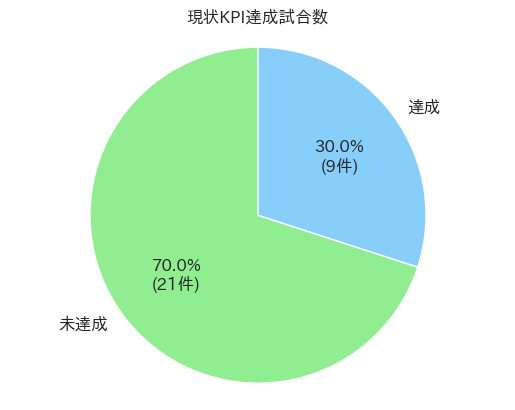

In [300]:
# 表示したい固定値を直接入力
correct_counts = pd.Series([21, 9])
total = correct_counts.sum()

# 円グラフの描画
plt.pie(
    correct_counts,
    labels=["未達成", "達成"],
    colors=['lightgreen', 'lightskyblue'],
    # パーセンテージと件数を両方表示する
    autopct=lambda pct: f'{pct:.1f}%\n({int(round(pct/100.*total))}件)',
    startangle=90,
    textprops={"fontsize": 12}
)
plt.title("現状KPI達成試合数")
plt.axis('equal')
plt.show()

In [177]:
analysis_df = pd.merge(df_game, mobilization_by_event, on='イベント名', how='left')

In [178]:
analysis_df.head()

,イベント開催日,曜日,天気,開催時間,対戦相手_x,イベント名,対戦相手_y,動員数
0,2024-10-05,土曜日,雨,14:00,広島D,2024-10-05 vs広島D,広島D,6010
1,2024-11-30,土曜日,晴れ,14:00,茨城R,2024-11-30 vs茨城R,茨城R,5475
2,2025-01-04,土曜日,曇り,19:00,名古屋D,2025-01-04 vs名古屋D,名古屋D,7425
3,2025-01-25,土曜日,雨,19:00,宇都宮B,2025-01-25 vs宇都宮B,宇都宮B,6805
4,2025-02-01,土曜日,曇り,14:00,滋賀L,2025-02-01 vs滋賀L,滋賀L,4457


In [179]:
kpi_threshold = 6000
analysis_df['KPI達成'] = analysis_df['動員数'] >= kpi_threshold

In [180]:
analysis_df.columns

Index(['イベント開催日', '曜日', '天気', '開催時間', '対戦相手_x', 'イベント名', '対戦相手_y', '動員数',
       'KPI達成'],
      dtype='object')

In [243]:
True_df = analysis_df[analysis_df['KPI達成'] == True]
True_df.sort_values(by="動員数",ascending=False)

,イベント開催日,曜日,天気,開催時間,対戦相手,イベント名,動員数,KPI達成
2,2025-01-04,土曜日,曇り,19:00,名古屋D,2025-01-04 vs名古屋D,6922,True
26,2025-03-26,水曜日,曇り,19:00,A東京,2025-03-26 vsA東京,6526,True
15,2025-01-26,日曜日,晴れ,14:00,宇都宮B,2025-01-26 vs宇都宮B,6450,True
3,2025-01-25,土曜日,雨,19:00,宇都宮B,2025-01-25 vs宇都宮B,6397,True
29,2025-05-21,水曜日,晴れ,19:00,A東京,2025-05-21 vsA東京,6371,True
14,2025-01-05,日曜日,雨,14:00,名古屋D,2025-01-05 vs名古屋D,6260,True
17,2025-02-16,日曜日,曇り,14:00,S渋谷,2025-02-16 vsS渋谷,6079,True


In [182]:
False_df = analysis_df[analysis_df['KPI達成'] == False]
False_df

,イベント開催日,曜日,天気,開催時間,対戦相手_x,イベント名,対戦相手_y,動員数,KPI達成
1,2024-11-30,土曜日,晴れ,14:00,茨城R,2024-11-30 vs茨城R,茨城R,5475,False
4,2025-02-01,土曜日,曇り,14:00,滋賀L,2025-02-01 vs滋賀L,滋賀L,4457,False
6,2025-02-22,土曜日,曇り,14:00,富山G,2025-02-22 vs富山G,富山G,4747,False
7,2025-03-08,土曜日,雨,14:00,F名古屋,2025-03-08 vsF名古屋,F名古屋,4954,False
8,2025-03-22,土曜日,晴れ,14:00,L北海道,2025-03-22 vsL北海道,L北海道,4702,False
9,2025-04-05,土曜日,曇り,14:00,島根S,2025-04-05 vs島根S,島根S,5416,False
10,2025-04-12,土曜日,雨,19:00,新潟A,2025-04-12 vs新潟A,新潟A,4309,False
11,2025-05-24,土曜日,曇り,14:00,仙台E,2025-05-24 vs仙台E,仙台E,5249,False
12,2024-10-06,日曜日,晴れ,14:00,広島D,2024-10-06 vs広島D,広島D,5990,False
13,2024-12-01,日曜日,曇り,14:00,茨城R,2024-12-01 vs茨城R,茨城R,5345,False


In [183]:
df_servey

,システムID,アリーナの清潔感,従業員の対応,商品,フードの質,席の快適感,チケットの値段,イベント内容,アリーナの案内,交通,全体の満足度
0,22588,1,3,1,5,4,5,5,2,2,5
1,4431,3,3,2,4,3,5,4,3,2,5
2,14306,3,5,2,3,2,5,3,3,3,5
3,27740,1,5,2,1,2,5,5,3,2,5
4,34155,5,5,2,5,1,5,3,2,3,5
...,...,...,...,...,...,...,...,...,...,...,...
25458,45099,4,4,3,4,2,4,4,3,3,2
25459,46502,5,3,3,3,2,2,5,3,2,2
25460,10432,5,1,5,4,5,3,4,2,1,2
25461,21264,5,2,4,4,2,1,2,2,4,2


In [184]:
# 1. チケット情報とアンケート情報を紐付け（どのユーザーがどのアンケートに回答したか）
merged_df = pd.merge(df_ticket, df_servey, on='システムID')
merged_df.head()

,システムID,イベント名,座種,アリーナの清潔感,従業員の対応,商品,フードの質,席の快適感,チケットの値段,イベント内容,アリーナの案内,交通,全体の満足度
0,33825,2024-10-05 vs広島D,コートサイド,3,2,3,3,3,2,2,3,1,5
1,16916,2024-10-05 vs広島D,コートサイド,4,2,1,4,3,2,3,1,2,1
2,13918,2024-10-05 vs広島D,コートサイド,5,3,5,3,2,2,4,1,3,1
3,26922,2024-10-05 vs広島D,コートサイド,5,4,2,3,5,4,3,2,3,4
4,50022,2024-10-05 vs広島D,コートサイド,4,5,4,5,3,2,3,2,1,5


In [185]:
survey_kpi_df = pd.merge(merged_df, analysis_df[['イベント名', 'KPI達成']], on='イベント名')
survey_kpi_df.head()

,システムID,イベント名,座種,アリーナの清潔感,従業員の対応,商品,フードの質,席の快適感,チケットの値段,イベント内容,アリーナの案内,交通,全体の満足度,KPI達成
0,33825,2024-10-05 vs広島D,コートサイド,3,2,3,3,3,2,2,3,1,5,True
1,16916,2024-10-05 vs広島D,コートサイド,4,2,1,4,3,2,3,1,2,1,True
2,13918,2024-10-05 vs広島D,コートサイド,5,3,5,3,2,2,4,1,3,1,True
3,26922,2024-10-05 vs広島D,コートサイド,5,4,2,3,5,4,3,2,3,4,True
4,50022,2024-10-05 vs広島D,コートサイド,4,5,4,5,3,2,3,2,1,5,True


In [186]:
survey_kpi_df.columns

Index(['システムID', 'イベント名', '座種', 'アリーナの清潔感', '従業員の対応', '商品', 'フードの質', '席の快適感',
       'チケットの値段', 'イベント内容', 'アリーナの案内', '交通', '全体の満足度', 'KPI達成'],
      dtype='object')

In [187]:
survey_columns = ['アリーナの清潔感', '従業員の対応', '商品', 'フードの質', '席の快適感','チケットの値段', 'イベント内容', 'アリーナの案内', '交通'] # 実際の項目に合わせて修正してください

# KPI達成/未達成グループごとに、各項目の平均点を計算
satisfaction_comparison = survey_kpi_df.groupby('KPI達成')[survey_columns].mean().T

print("\n--- KPI達成/未達成グループの満足度平均点比較 ---")
satisfaction_comparison


--- KPI達成/未達成グループの満足度平均点比較 ---


KPI達成,False,True
アリーナの清潔感,3.929900,3.915043
従業員の対応,3.573690,3.589057
商品,3.227271,3.233624
フードの質,3.357249,3.355367
席の快適感,2.815087,2.814581
チケットの値段,2.788601,2.804356
イベント内容,3.359957,3.361708
アリーナの案内,2.678105,2.694466
交通,2.605925,2.602470


In [188]:
# 1. KPI達成グループと未達成グループのデータを分ける
achieved_group = survey_kpi_df[survey_kpi_df['KPI達成'] == True]
not_achieved_group = survey_kpi_df[survey_kpi_df['KPI達成'] == False]

# 2. t検定を実行する評価項目のリスト
survey_columns = [
    'アリーナの清潔感', '従業員の対応', '商品', 'フードの質',
    '席の快適感', 'チケットの値段', 'イベント内容', 'アリーナの案内', '交通'
]

# 3. 各項目でt検定を実行し、結果を保存
results = []
for col in survey_columns:
    # t検定の実行（2つのグループの各項目のデータを渡す）
    t_stat, p_value = stats.ttest_ind(achieved_group[col], not_achieved_group[col], nan_policy='omit')
    results.append({'評価項目': col, 'p値': p_value})

results

[{'評価項目': 'アリーナの清潔感', 'p値': np.float64(0.06600163774105215)},
 {'評価項目': '従業員の対応', 'p値': np.float64(0.06549238019036718)},
 {'評価項目': '商品', 'p値': np.float64(0.4717879374319738)},
 {'評価項目': 'フードの質', 'p値': np.float64(0.8442059685878927)},
 {'評価項目': '席の快適感', 'p値': np.float64(0.954003988497793)},
 {'評価項目': 'チケットの値段', 'p値': np.float64(0.04744704483450575)},
 {'評価項目': 'イベント内容', 'p値': np.float64(0.832034413999807)},
 {'評価項目': 'アリーナの案内', 'p値': np.float64(0.05157950634494396)},
 {'評価項目': '交通', 'p値': np.float64(0.7016661137394689)}]

おのおのアンケート項目をt検定をかけたら、チケットの値段のみが統計的に満足度に差があると出たが、値段は一律なはず。てことは、KPI未達成がチケットと値段が見合っていないと評価されているのでは。

座席の種類によって値段が違うからそれによって満足度に差が出ているのでは。

In [189]:
#重回帰分析で二値データをロジスティック回帰

In [220]:
mobilization = df_ticket.groupby('イベント名')['システムID'].nunique().reset_index(name='動員数')
analysis_df = pd.merge(df_game, mobilization, on='イベント名', how='left')
analysis_df['KPI達成'] = analysis_df['動員数'] >= 6000 # 仮のKPI

# b. ユーザー、チケット、アンケート情報を結合
user_ticket_survey = pd.merge(df_ticket, df_user, on='システムID', how='left')
user_ticket_survey = pd.merge(user_ticket_survey, df_servey, on='システムID', how='left')

# c. 全ての情報をマージして分析用データフレームを作成
final_df = pd.merge(user_ticket_survey, analysis_df, on='イベント名', how='left')


# --- 2. データの前処理 ---
# a. 欠損値の処理（中央値で補完）
final_df.fillna(final_df.median(numeric_only=True), inplace=True)

# b. ★★★ここがポイント★★★
#    モデルが計算できるように、文字データをすべて数値（ダミー変数）に変換する
categorical_features = ['曜日', '天気', '対戦相手', '座種']
processed_df = pd.get_dummies(final_df, columns=categorical_features, drop_first=True)

In [222]:
processed_df.columns

Index(['システムID', 'イベント名', '年齢', '性別', '都道府県', '市区町村', 'FC', 'SNS', 'アリーナの清潔感',
       '従業員の対応', '商品', 'フードの質', '席の快適感', 'チケットの値段', 'イベント内容', 'アリーナの案内', '交通',
       '全体の満足度', 'イベント開催日', '開催時間', '動員数', 'KPI達成', '曜日_日曜日', '曜日_水曜日',
       '天気_曇り', '天気_雨', '対戦相手_F名古屋', '対戦相手_L北海道', '対戦相手_S渋谷', '対戦相手_京都H',
       '対戦相手_仙台E', '対戦相手_名古屋D', '対戦相手_大阪E', '対戦相手_宇都宮B', '対戦相手_富山G',
       '対戦相手_島根S', '対戦相手_広島D', '対戦相手_新潟A', '対戦相手_滋賀L', '対戦相手_茨城R', '座種_アリーナB',
       '座種_アリーナC', '座種_コートサイド', '座種_テーブルシート', '座種_バルコニー', '座種_立ち見'],
      dtype='object')

In [238]:
# --- 3. 説明変数（X）と目的変数（y）の定義 ---
# 目的変数y
y = processed_df['KPI達成'].astype(bool) # bool型に変換

# 説明変数X
# processed_dfには、もう「対戦相手」列はなく、「対戦相手_広島D」のような数値列だけがある
X = processed_df.drop(columns=["年齢","性別","都道府県","市区町村",'FC','動員数', '曜日_日曜日', '曜日_水曜日', '天気_曇り',
       '天気_雨', 'SNS','KPI達成', 'システムID', 'イベント名', "イベント開催日", '開催時間'])

In [239]:
X.columns

Index(['アリーナの清潔感', '従業員の対応', '商品', 'フードの質', '席の快適感', 'チケットの値段', 'イベント内容',
       'アリーナの案内', '交通', '全体の満足度', '対戦相手_F名古屋', '対戦相手_L北海道', '対戦相手_S渋谷',
       '対戦相手_京都H', '対戦相手_仙台E', '対戦相手_名古屋D', '対戦相手_大阪E', '対戦相手_宇都宮B',
       '対戦相手_富山G', '対戦相手_島根S', '対戦相手_広島D', '対戦相手_新潟A', '対戦相手_滋賀L', '対戦相手_茨城R',
       '座種_アリーナB', '座種_アリーナC', '座種_コートサイド', '座種_テーブルシート', '座種_バルコニー',
       '座種_立ち見'],
      dtype='object')

In [240]:
# --- 4. ロジスティック回帰モデルの構築と学習 ---
model = LogisticRegression(max_iter=1000) # モデルを準備
model.fit(X, y) # データを使って学習

LogisticRegression(max_iter=1000)

In [241]:
# --- 5. 結果の解釈 ---
coefficients = pd.DataFrame(model.coef_[0], index=X.columns, columns=['係数'])
# 解釈しやすくするため「オッズ比」の列を追加
coefficients['オッズ比'] = np.exp(coefficients['係数'])

sorted_coefficients = coefficients.sort_values('係数', ascending=False)
print("--- KPI達成に影響を与える要因（係数）---")
sorted_coefficients

--- KPI達成に影響を与える要因（係数）---


,係数,オッズ比
対戦相手_名古屋D,3.796746,44.555963
対戦相手_宇都宮B,3.695516,40.266362
座種_アリーナB,0.129508,1.138268
座種_バルコニー,0.102267,1.107680
席の快適感,0.034138,1.034727
フードの質,0.019023,1.019205
全体の満足度,0.010191,1.010243
チケットの値段,0.005832,1.005849
従業員の対応,0.001609,1.001610
交通,-0.000818,0.999182


In [244]:
True_df["対戦相手"].unique()

array(['名古屋D', '宇都宮B', 'S渋谷', 'A東京'], dtype=object)

影響が大きい対戦相手はKPI達成している

対戦相手によって、集客が違うことが問題

Tier分類する。差別化戦略をとる。

Tier A (ドル箱カード): A東京, 宇都宮B, S渋谷, 名古屋D

Tier B (当落線上のカード): 広島D

Tier C (育成カード): 上記以外の全チーム

In [245]:
final_df.columns

Index(['システムID', 'イベント名', '座種', '年齢', '性別', '都道府県', '市区町村', 'FC', 'SNS',
       'アリーナの清潔感', '従業員の対応', '商品', 'フードの質', '席の快適感', 'チケットの値段', 'イベント内容',
       'アリーナの案内', '交通', '全体の満足度', 'イベント開催日', '曜日', '天気', '開催時間', '対戦相手', '動員数',
       'KPI達成'],
      dtype='object')

In [246]:
mobilization2 = df_ticket.groupby('イベント名')['システムID'].nunique().reset_index(name='動員数')
analysis_df2 = pd.merge(df_game, mobilization2, on='イベント名', how='left')
analysis_df2['KPI達成'] = analysis_df['動員数'] >= 6000

# 2. ユーザー、チケット、アンケート情報を結合
#    df_ticket をベースに、ユーザー情報(df_user)とアンケート情報(df_servey)を結合
user_ticket_survey2 = pd.merge(df_ticket, df_user, on='システムID', how='left')
user_ticket_survey2 = pd.merge(user_ticket_survey2, df_servey, on='システムID', how='left')

# 3. 全てのデータを結合
#    上記にイベント情報(analysis_df)を結合
final_df = pd.merge(user_ticket_survey2, analysis_df2, on='イベント名', how='left')

In [247]:
# 1. 対戦相手のティアを定義
def assign_tier(opponent):
    if opponent in ['A東京', '宇都宮B', 'S渋谷', '名古屋D']:
        return 'Tier A(A東京、宇都宮B、S渋谷、名古屋D)'
    elif opponent == '広島D':
        return 'Tier B(広島D)'
    else:
        return 'Tier C(それ以外)'

final_df['OpponentTier'] = final_df['対戦相手'].apply(assign_tier)

# 2. ティアごとに顧客の属性（例：性別）を比較
segment_analysis = final_df.groupby('OpponentTier')['性別'].value_counts(normalize=True).unstack()

print("--- ティア別・顧客の性別構成比 ---")
segment_analysis

--- ティア別・顧客の性別構成比 ---


性別,女性,男性
OpponentTier,,
Tier A(A東京、宇都宮B、S渋谷、名古屋D),0.652062,0.347938
Tier B(広島D),0.650667,0.349333
Tier C(それ以外),0.649836,0.350164


In [248]:
final_df.groupby('OpponentTier')['座種'].value_counts(normalize=True).unstack()

座種,アリーナA,アリーナB,アリーナC,コートサイド,テーブルシート,バルコニー,立ち見
OpponentTier,,,,,,,
Tier A(A東京、宇都宮B、S渋谷、名古屋D),0.414304,0.205286,0.060382,0.093223,0.035834,0.135115,0.055856
Tier B(広島D),0.426000,0.201083,0.059417,0.084833,0.037250,0.136250,0.055167
Tier C(それ以外),0.445282,0.166391,0.086814,0.114361,0.042063,0.072497,0.072591


/tmp/ipython-input-288-2744373143.py:20: UserWarning: Glyph 21106 (\N{CJK UNIFIED IDEOGRAPH-5272}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/tmp/ipython-input-288-2744373143.py:20: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/tmp/ipython-input-288-2744373143.py:20: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/tmp/ipython-input-288-2744373143.py:20: UserWarning: Glyph 12451 (\N{KATAKANA LETTER SMALL I}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/tmp/ipython-input-288-2744373143.py:20: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/tmp/ipython-input-288-2744373143.py:20: UserWarning: Glyph 21029 (\N{CJK UNIFIED IDEOGRAPH-5225}) missing from font(s) DejaVu Sans.
  plt.tight_layou

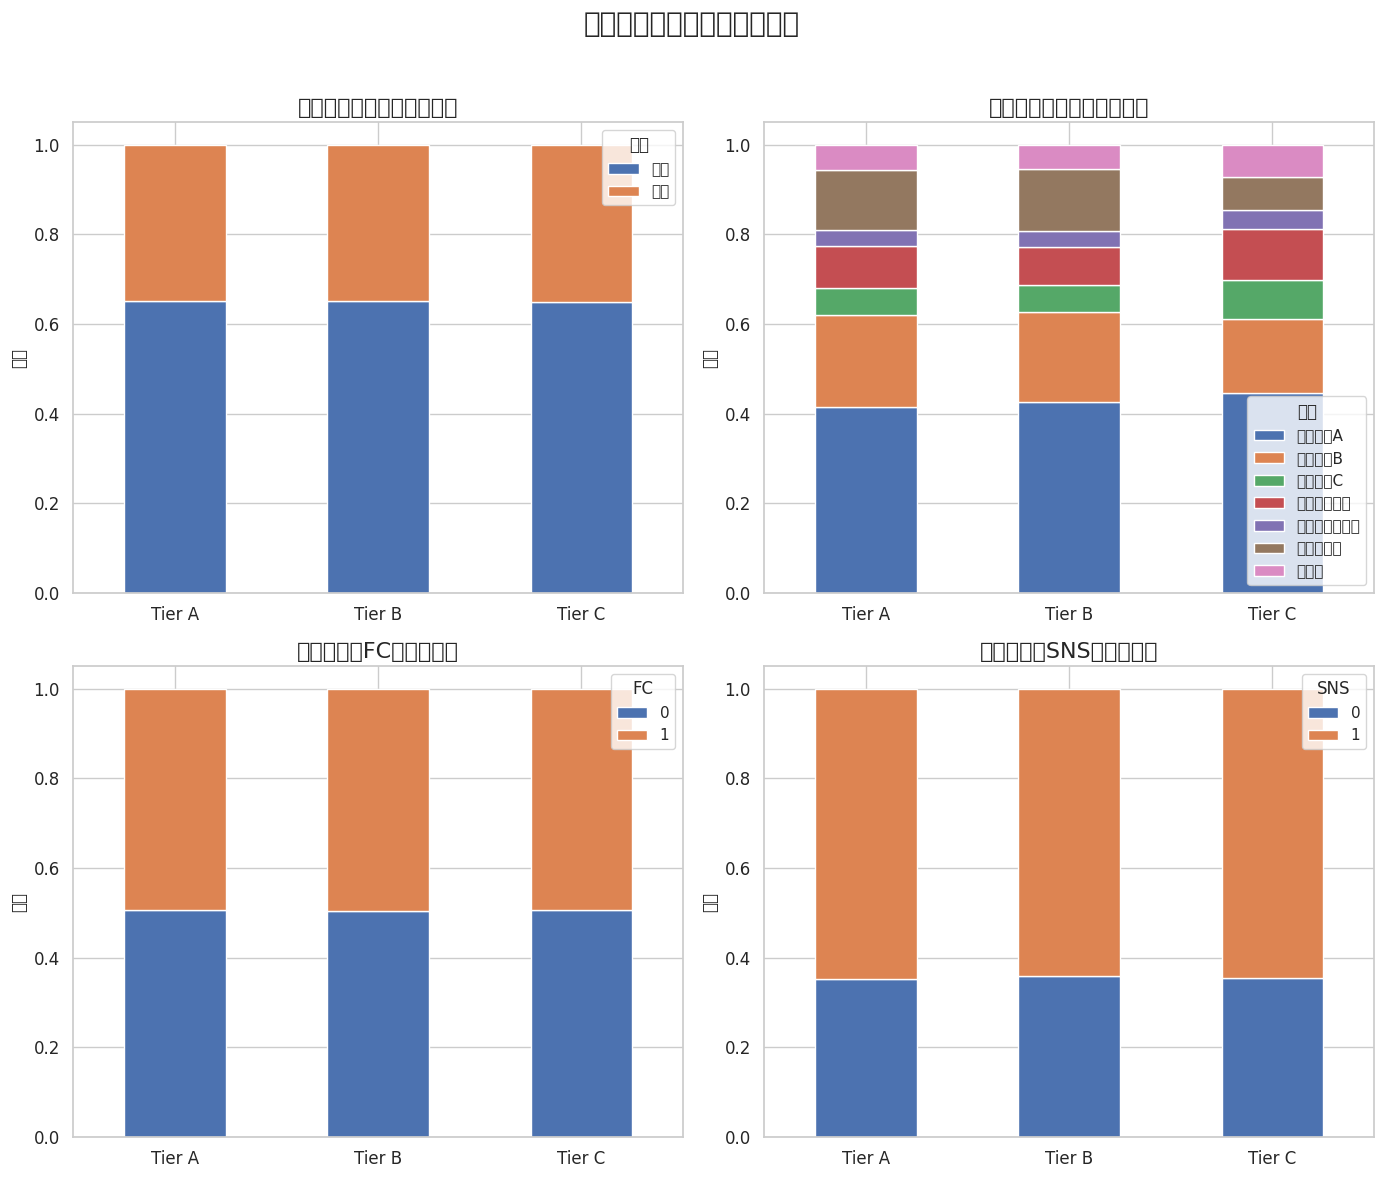

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40802 (\N{CJK UNIFIED IDEOGRAPH-9F62}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12451 (\N{KATAKANA LETTER SMALL I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figu

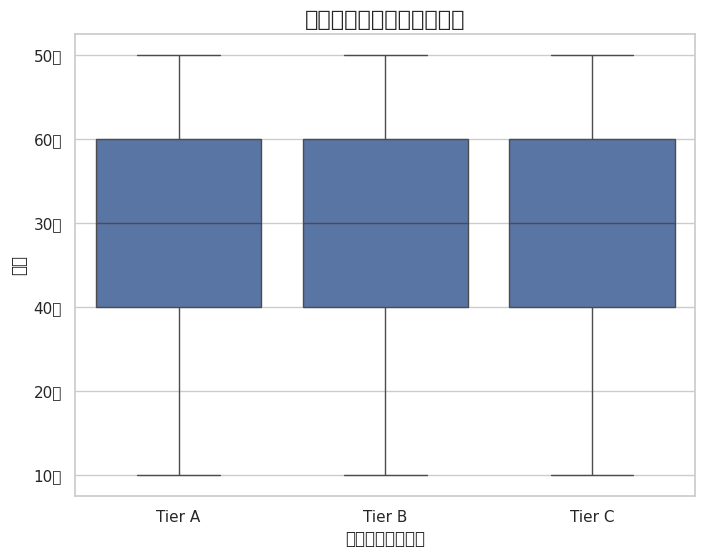

In [288]:
# 比較したい属性のリスト
comparison_features = ['性別', '座種', 'FC', 'SNS']

# グラフをまとめて表示
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('ティア別・顧客属性の構成比', fontsize=20)
axes = axes.flatten() # グラフ描画を簡単にするため、2x2のaxesを1次元配列に変換

# 1. カテゴリ属性の比較（性別、座種など）
for i, feature in enumerate(comparison_features):
    # ティアごとに各属性の割合を計算
    prop_df = final_df.groupby('OpponentTier')[feature].value_counts(normalize=True).unstack()
    # 積み上げ棒グラフで可視化
    prop_df.plot(kind='bar', stacked=True, ax=axes[i], rot=0, fontsize=12)
    axes[i].set_title(f'ティア別「{feature}」の構成比', fontsize=16)
    axes[i].set_ylabel('割合', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].legend(title=feature)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 2. 数値属性の比較（年齢）
plt.figure(figsize=(8, 6))
sns.boxplot(x='OpponentTier', y='年齢', data=final_df, order=['Tier A', 'Tier B', 'Tier C'])
plt.title('ティア別・顧客の年齢分布', fontsize=16)
plt.xlabel('対戦相手のティア', fontsize=12)
plt.ylabel('年齢', fontsize=12)
plt.show()

▼ 性別の構成比
性別               女性     男性
OpponentTier              
Tier A        65.2%  34.8%
Tier B        65.1%  34.9%
Tier C        65.0%  35.0%
------------------------------
▼ 座種の構成比
座種            アリーナA  アリーナB アリーナC コートサイド テーブルシート  バルコニー   立ち見
OpponentTier                                                
Tier A        41.4%  20.5%  6.0%   9.3%    3.6%  13.5%  5.6%
Tier B        42.6%  20.1%  5.9%   8.5%    3.7%  13.6%  5.5%
Tier C        44.5%  16.6%  8.7%  11.4%    4.2%   7.2%  7.3%
------------------------------
▼ FCの構成比
FC                0      1
OpponentTier              
Tier A        50.6%  49.4%
Tier B        50.3%  49.7%
Tier C        50.6%  49.4%
------------------------------
▼ SNSの構成比
SNS               0      1
OpponentTier              
Tier A        35.2%  64.8%
Tier B        35.8%  64.2%
Tier C        35.4%  64.6%
------------------------------


/tmp/ipython-input-289-2653987808.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(prop_df.applymap('{:.1%}'.format)) # パーセント表示
/tmp/ipython-input-289-2653987808.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(prop_df.applymap('{:.1%}'.format)) # パーセント表示
/tmp/ipython-input-289-2653987808.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(prop_df.applymap('{:.1%}'.format)) # パーセント表示
/tmp/ipython-input-289-2653987808.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(prop_df.applymap('{:.1%}'.format)) # パーセント表示
/tmp/ipython-input-289-2653987808.py:27: UserWarning: Glyph 21106 (\N{CJK UNIFIED IDEOGRAPH-5272}) missing from font(s) DejaVu Sans.
  fig.tight_layout(rect=[0, 0, 1, 0.96])
/tmp/ipython-input-289-2653987808.py:27: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) De

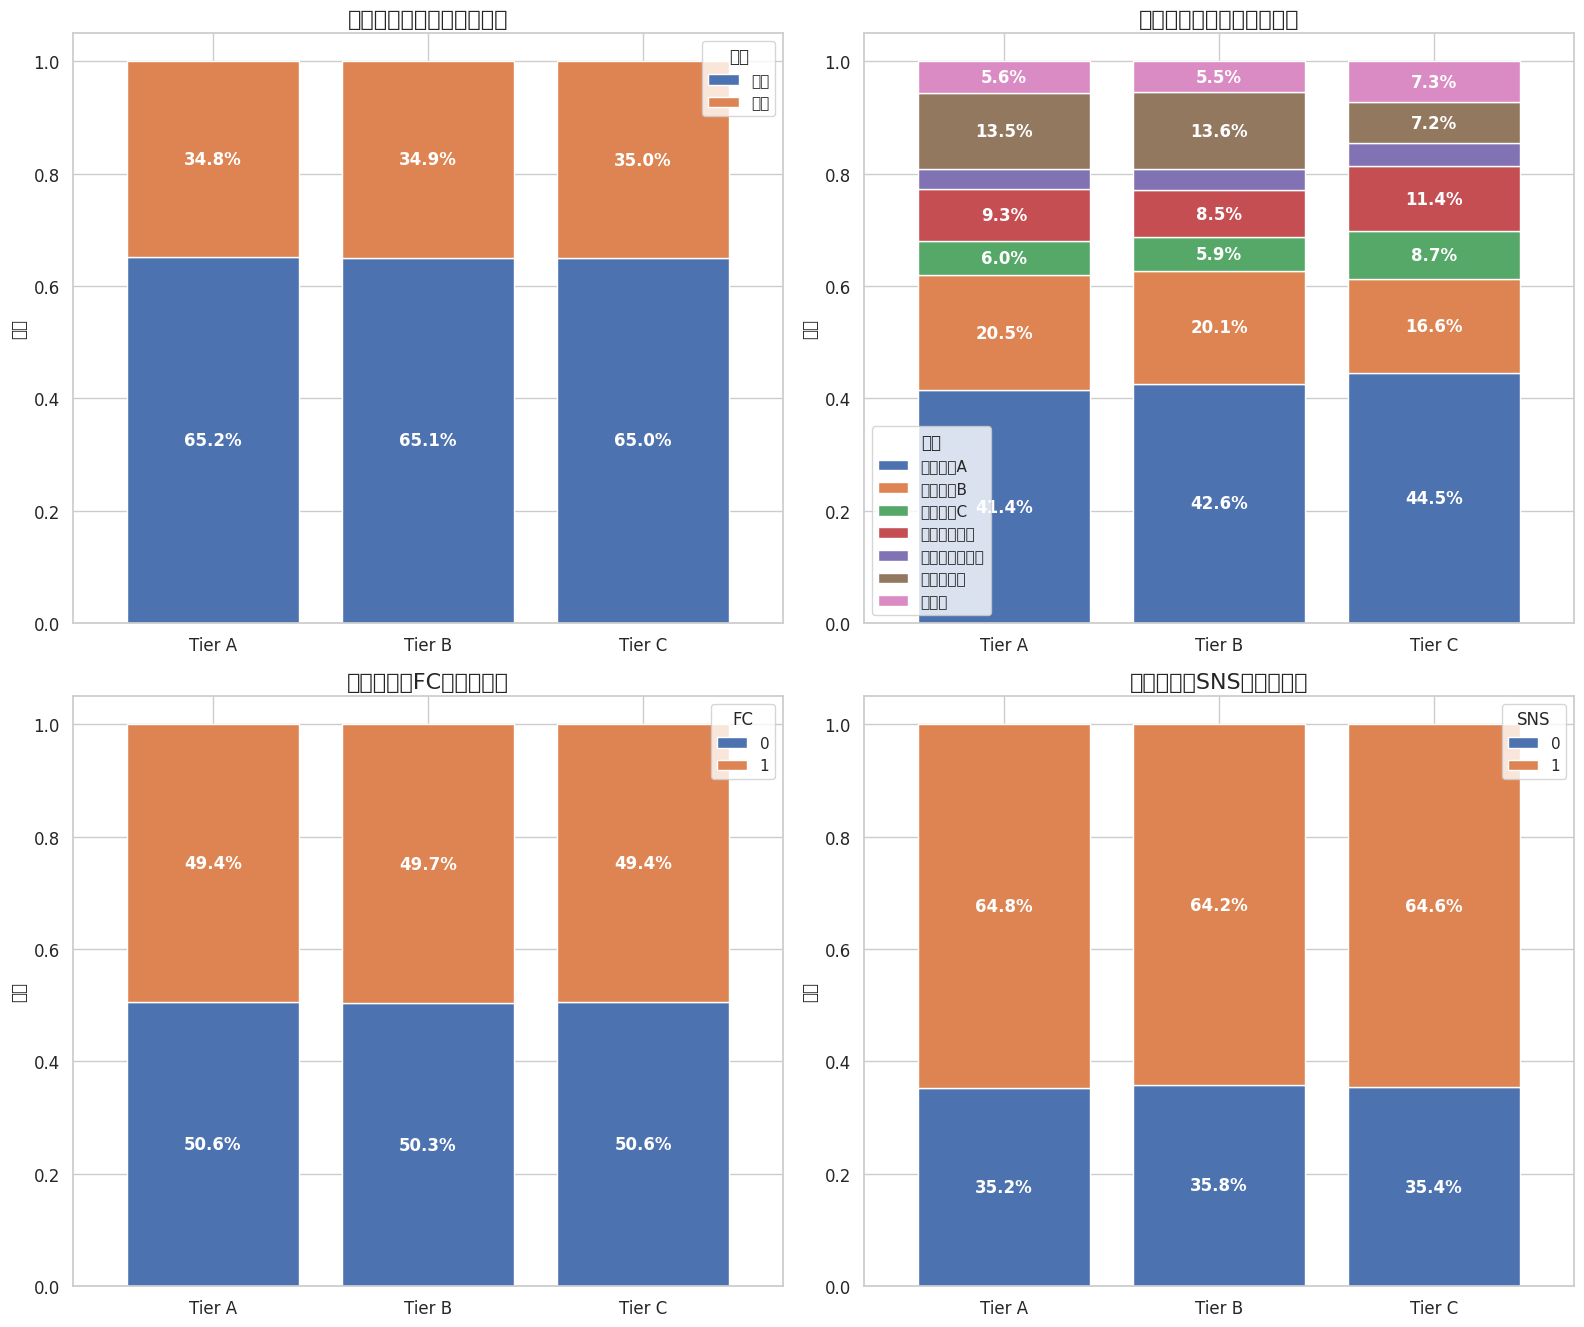


--- ティア別・顧客の年齢分布（数値）---

              count unique  top   freq
OpponentTier                          
Tier A        54139      6  40代  16304
Tier B        12000      6  40代   3555
Tier C        95618      6  40代  28533


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40802 (\N{CJK UNIFIED IDEOGRAPH-9F62}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12451 (\N{KATAKANA LETTER SMALL I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figu

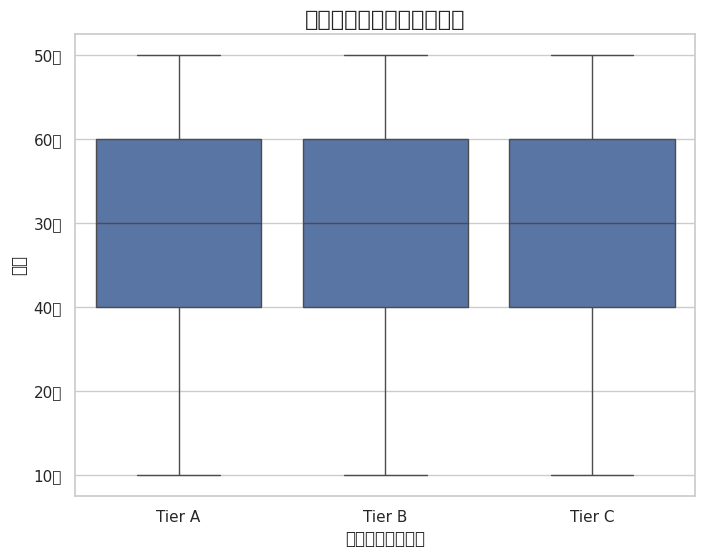

▼ 性別の構成比
性別               女性     男性
OpponentTier              
Tier A        65.2%  34.8%
Tier B        65.1%  34.9%
Tier C        65.0%  35.0%
------------------------------
▼ 座種の構成比
座種            アリーナA  アリーナB アリーナC コートサイド テーブルシート  バルコニー   立ち見
OpponentTier                                                
Tier A        41.4%  20.5%  6.0%   9.3%    3.6%  13.5%  5.6%
Tier B        42.6%  20.1%  5.9%   8.5%    3.7%  13.6%  5.5%
Tier C        44.5%  16.6%  8.7%  11.4%    4.2%   7.2%  7.3%
------------------------------
▼ FCの構成比
FC                0      1
OpponentTier              
Tier A        50.6%  49.4%
Tier B        50.3%  49.7%
Tier C        50.6%  49.4%
------------------------------
▼ SNSの構成比
SNS               0      1
OpponentTier              
Tier A        35.2%  64.8%
Tier B        35.8%  64.2%
Tier C        35.4%  64.6%
------------------------------


/tmp/ipython-input-289-2653987808.py:52: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(prop_df.applymap('{:.1%}'.format)) # パーセント表示
/tmp/ipython-input-289-2653987808.py:52: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(prop_df.applymap('{:.1%}'.format)) # パーセント表示
/tmp/ipython-input-289-2653987808.py:52: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(prop_df.applymap('{:.1%}'.format)) # パーセント表示
/tmp/ipython-input-289-2653987808.py:52: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(prop_df.applymap('{:.1%}'.format)) # パーセント表示
/tmp/ipython-input-289-2653987808.py:69: UserWarning: Glyph 21106 (\N{CJK UNIFIED IDEOGRAPH-5272}) missing from font(s) DejaVu Sans.
  fig.tight_layout(rect=[0, 0, 1, 0.96])
/tmp/ipython-input-289-2653987808.py:69: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) De

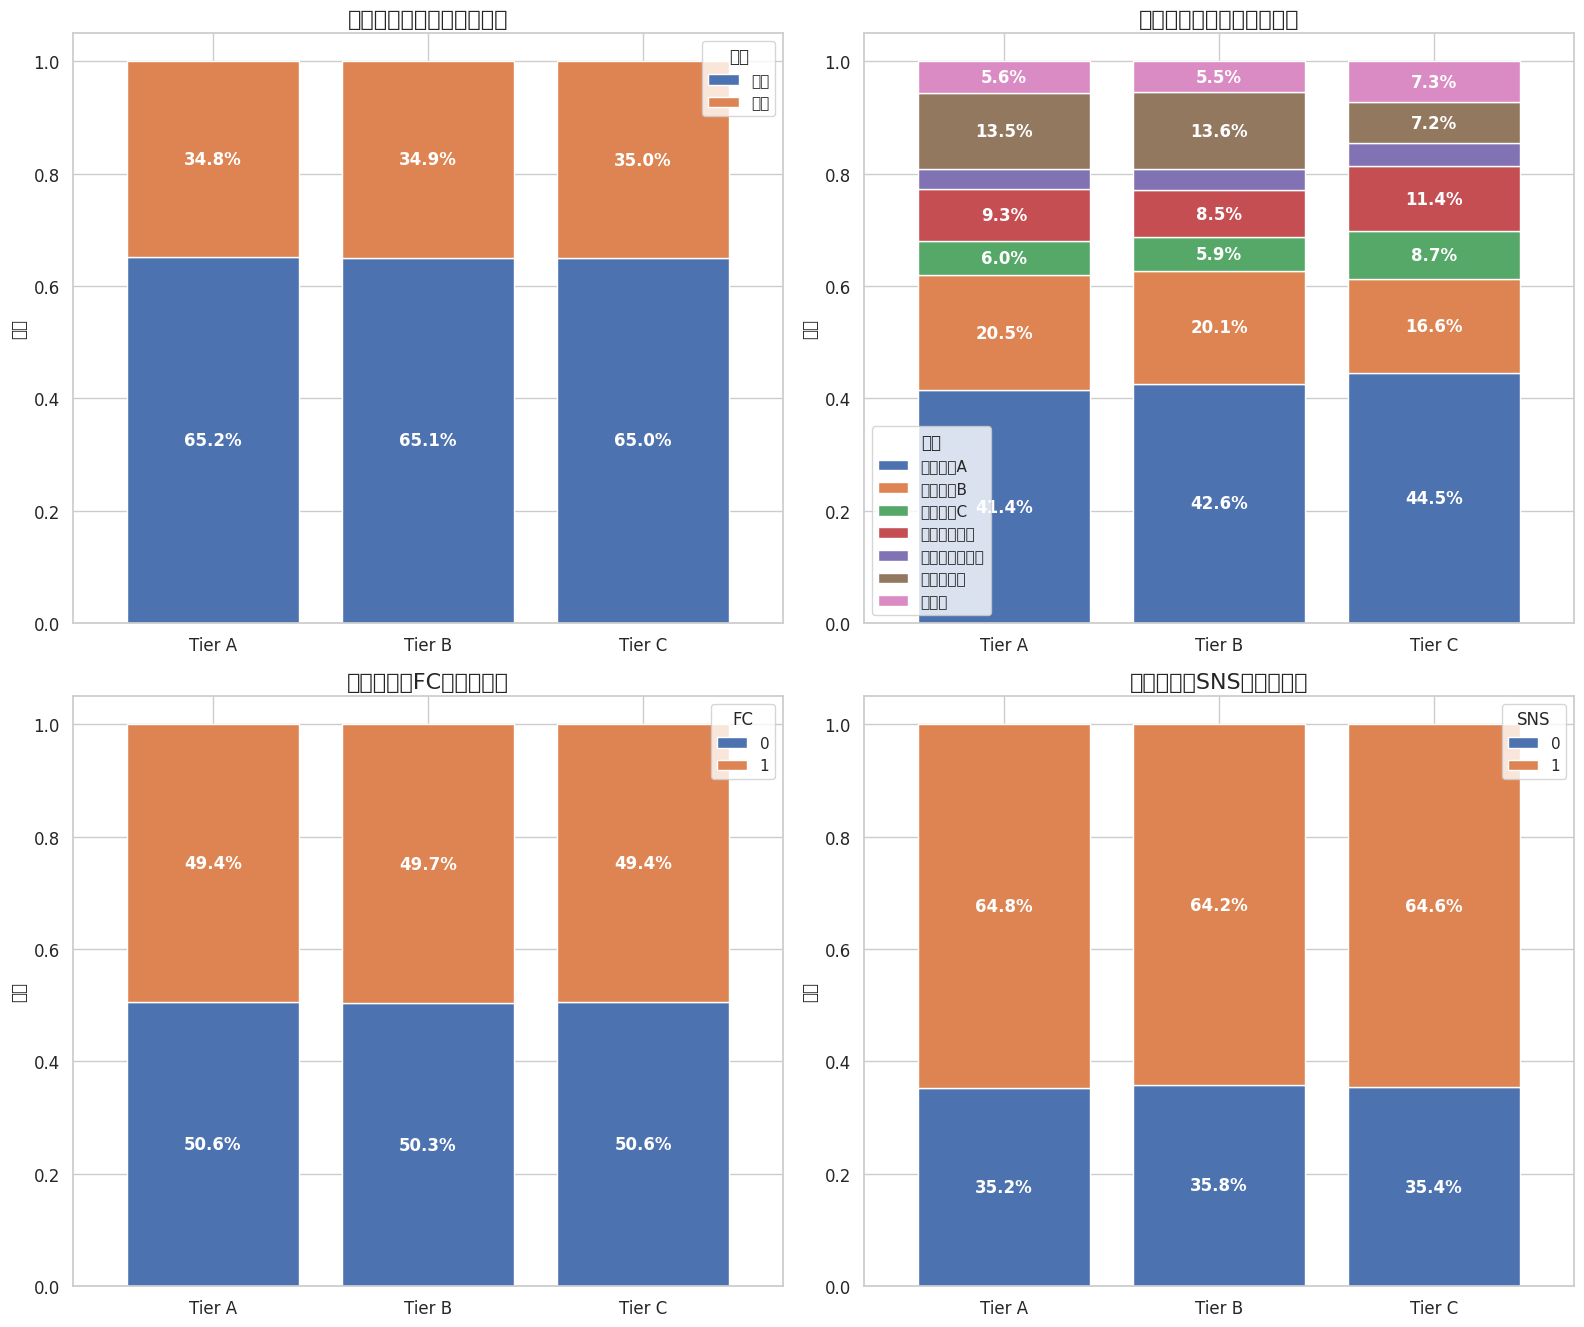


--- ティア別・顧客の年齢分布（数値）---

              count unique  top   freq
OpponentTier                          
Tier A        54139      6  40代  16304
Tier B        12000      6  40代   3555
Tier C        95618      6  40代  28533


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40802 (\N{CJK UNIFIED IDEOGRAPH-9F62}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12451 (\N{KATAKANA LETTER SMALL I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figu

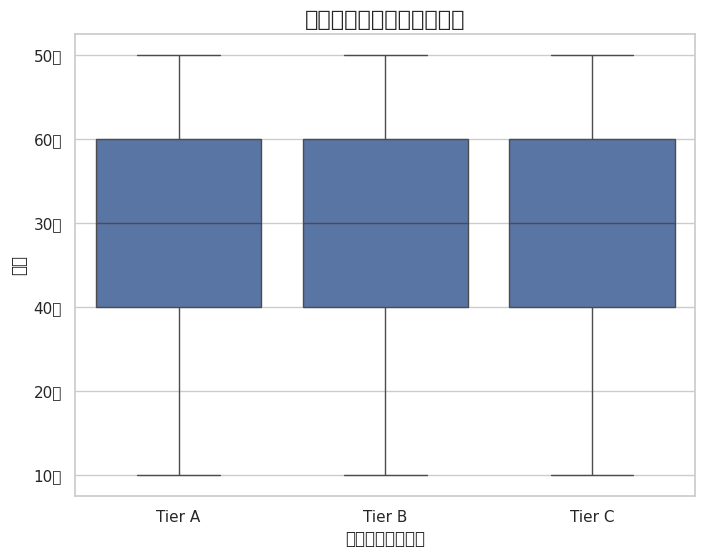

In [289]:
# グラフをまとめて表示
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()

# 1. カテゴリ属性の比較（性別、座種など）
for i, feature in enumerate(comparison_features):
    # ① 数値で可視化（構成比テーブルの表示）
    prop_df = final_df.groupby('OpponentTier')[feature].value_counts(normalize=True).unstack().fillna(0)
    print(f"▼ {feature}の構成比")
    print(prop_df.applymap('{:.1%}'.format)) # パーセント表示
    print("-" * 30)

    # ② グラフで可視化
    prop_df.plot(kind='bar', stacked=True, ax=axes[i], rot=0, fontsize=12, width=0.8)
    axes[i].set_title(f'ティア別「{feature}」の構成比', fontsize=16)
    axes[i].set_ylabel('割合', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].legend(title=feature)

    # ②-2. グラフに数値を表示する処理
    for c in axes[i].containers:
        # 小さすぎるラベルは非表示にするための閾値
        label_threshold = 0.05
        labels = [f'{v.get_height():.1%}' if v.get_height() > label_threshold else '' for v in c]
        axes[i].bar_label(c, labels=labels, label_type='center', color='white', fontsize=12, fontweight='bold')

fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- 年齢の分析 ---
print("\n--- ティア別・顧客の年齢分布（数値）---\n")
# ① 数値で可視化（記述統計量の表示）
age_desc = final_df.groupby('OpponentTier')['年齢'].describe()
print(age_desc)

# ② グラフで可視化
plt.figure(figsize=(8, 6))
sns.boxplot(x='OpponentTier', y='年齢', data=final_df, order=['Tier A', 'Tier B', 'Tier C'])
plt.title('ティア別・顧客の年齢分布', fontsize=16)
plt.xlabel('対戦相手のティア', fontsize=12)
plt.ylabel('年齢', fontsize=12)
plt.show()
# グラフをまとめて表示
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()

# 1. カテゴリ属性の比較（性別、座種など）
for i, feature in enumerate(comparison_features):
    # ① 数値で可視化（構成比テーブルの表示）
    prop_df = final_df.groupby('OpponentTier')[feature].value_counts(normalize=True).unstack().fillna(0)
    print(f"▼ {feature}の構成比")
    print(prop_df.applymap('{:.1%}'.format)) # パーセント表示
    print("-" * 30)

    # ② グラフで可視化
    prop_df.plot(kind='bar', stacked=True, ax=axes[i], rot=0, fontsize=12, width=0.8)
    axes[i].set_title(f'ティア別「{feature}」の構成比', fontsize=16)
    axes[i].set_ylabel('割合', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].legend(title=feature)

    # ②-2. グラフに数値を表示する処理
    for c in axes[i].containers:
        # 小さすぎるラベルは非表示にするための閾値
        label_threshold = 0.05
        labels = [f'{v.get_height():.1%}' if v.get_height() > label_threshold else '' for v in c]
        axes[i].bar_label(c, labels=labels, label_type='center', color='white', fontsize=12, fontweight='bold')

fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- 年齢の分析 ---
print("\n--- ティア別・顧客の年齢分布（数値）---\n")
# ① 数値で可視化（記述統計量の表示）
age_desc = final_df.groupby('OpponentTier')['年齢'].describe()
print(age_desc)

# ② グラフで可視化
plt.figure(figsize=(8, 6))
sns.boxplot(x='OpponentTier', y='年齢', data=final_df, order=['Tier A', 'Tier B', 'Tier C'])
plt.title('ティア別・顧客の年齢分布', fontsize=16)
plt.xlabel('対戦相手のティア', fontsize=12)
plt.ylabel('年齢', fontsize=12)
plt.show()


座種            アリーナA  アリーナB アリーナC コートサイド テーブルシート  バルコニー   立ち見
OpponentTier                                                
Tier A        41.4%  20.5%  6.0%   9.3%    3.6%  13.5%  5.6%
Tier B        42.6%  20.1%  5.9%   8.5%    3.7%  13.6%  5.5%
Tier C        44.5%  16.6%  8.7%  11.4%    4.2%   7.2%  7.3%

テーブルシートとアリーナBに着目

In [250]:
df_sns

,ポストした日,ポスト内容,フォロワー数,いいね数,シェア数,インプレッション数,クリック数
0,2024-10-05,新シーズン開幕！,130230,3815,1195,307676,6610
1,2024-10-05,チケット販売中!,130242,474,247,66422,824
2,2024-10-05,コーチ独占インタビュー,130246,670,207,56367,1317
3,2024-10-05,今後のイベント,130344,1123,555,142867,1957
4,2024-10-05,トレーニングの秘訣,130423,689,373,100664,1175
...,...,...,...,...,...,...,...
139,2025-05-25,勝ちました！,139563,1748,588,155762,2601
140,2025-05-25,今日のヒーロー！,139589,1300,608,152252,2229
141,2025-05-25,今日の試合を振り返って,139616,864,383,107117,1261
142,2025-05-25,シーズンハイライト,139632,662,251,66079,936


In [251]:
# クリック数が多い順に並び替え
df_sns_sort_clik = df_sns.sort_values(by='クリック数', ascending=False)

print("\n--- チケット関連投稿のクリック数ランキング ---")
df_sns_sort_clik = df_sns_sort_clik[['ポスト内容', 'クリック数', 'ポストした日']]
print(df_sns_sort_clik.count())
df_sns_sort_clik


--- チケット関連投稿のクリック数ランキング ---
ポスト内容     144
クリック数     144
ポストした日    144
dtype: int64


,ポスト内容,クリック数,ポストした日
0,新シーズン開幕！,6610,2024-10-05
77,勝ちました！,4721,2025-02-22
6,勝ちました！,4567,2024-10-05
120,勝ちました！,4230,2025-04-13
31,勝ちました！,4089,2025-01-04
...,...,...,...
1,チケット販売中!,824,2024-10-05
57,今日の試合を振り返って,787,2025-02-02
135,負けました…,716,2025-05-24
89,負けました…,592,2025-03-09


In [252]:
# --- 2. ポジネガの割り振り（キーワード方式） ---
def assign_sentiment(post_content):
    positive_keywords = ['勝利', '勝ち', 'ヒーロー', 'ハイライト', '開幕', '応援ありがとう']
    negative_keywords = ['敗戦', '負け', '惜敗', '課題']
    if any(keyword in post_content for keyword in positive_keywords):
        return 'Positive'
    elif any(keyword in post_content for keyword in negative_keywords):
        return 'Negative'
    else:
        return 'Neutral'

In [253]:
df_sns['Sentiment'] = df_sns['ポスト内容'].apply(assign_sentiment)

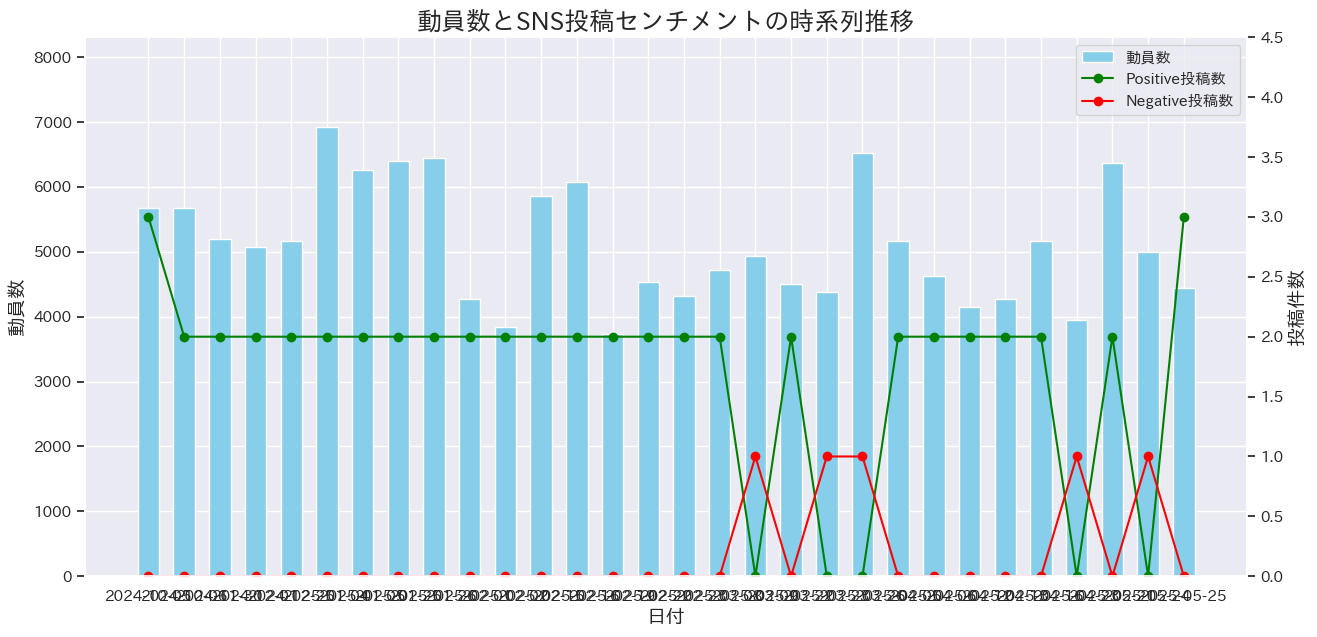

In [254]:
sentiment_counts = df_sns.groupby(['ポストした日', 'Sentiment']).size().unstack(fill_value=0)
sentiment_counts = sentiment_counts.reset_index() # ★★★ ここを修正 ★★★


# --- 4. グラフの描画（2軸グラフ） ---
# 2つのデータを日付をキーに結合
plot_df = pd.merge(sentiment_counts, analysis_df, left_on='ポストした日', right_on='イベント開催日', how='outer').fillna(0)
plot_df = plot_df.sort_values('ポストした日').set_index('ポストした日')

# (グラフ描画部分は前回と同じ)
fig, ax1 = plt.subplots(figsize=(15, 7))
ax2 = ax1.twinx()
ax1.bar(plot_df.index, plot_df['動員数'], color='skyblue', width=0.6, label='動員数')
ax1.set_ylabel('動員数', fontsize=14)
ax1.set_ylim(0, plot_df['動員数'].max() * 1.2)
ax2.plot(plot_df.index, plot_df.get('Positive', 0), color='green', marker='o', linestyle='-', label='Positive投稿数')
ax2.plot(plot_df.index, plot_df.get('Negative', 0), color='red', marker='o', linestyle='-', label='Negative投稿数')
ax2.set_ylabel('投稿件数', fontsize=14)
ax2.set_ylim(0, max(plot_df.get('Positive', [0]).max(), plot_df.get('Negative', [0]).max()) * 1.5) # y軸の最大値を少し調整
plt.title('動員数とSNS投稿センチメントの時系列推移', fontsize=18)
ax1.set_xlabel('日付', fontsize=14)
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.grid(False)
plt.show()


In [267]:
# a. ユーザー情報とチケット購入情報を結合
user_ticket_df = pd.merge(df_ticket, df_user, on='システムID', how='left')
# b. 上記にイベント情報を結合
final_df = pd.merge(user_ticket_df, df_game, on='イベント名', how='left')

In [268]:
# c. 対戦相手のティアを定義
def assign_tier(opponent):
    if opponent in ['A東京', '宇都宮B', 'S渋谷', '名古屋D']:
        return 'Tier A'
    elif opponent == '広島D':
        return 'Tier B'
    else:
        return 'Tier C'
final_df['OpponentTier'] = final_df['対戦相手'].apply(assign_tier)

In [284]:
# 'OpponentTier'が'Tier C'の行を抽出
tier_c_df = final_df[final_df['OpponentTier'] == 'Tier C']
tier_c_df['年齢'].value_counts()

,count
年齢,
40代,28533
30代,23900
50代,19169
20代,14483
60代,4811
10代,4722


In [285]:
tier_c_df['性別'].value_counts()

,count
性別,
女性,62136
男性,33482


In [287]:
import pandas as pd

# 前提：final_df には 'OpponentTier', '年齢', '性別' の列が含まれているとします

# 1. 'OpponentTier' が 'Tier C' のデータを抽出
tier_c_df = final_df[final_df['OpponentTier'] == 'Tier C']

# 2. 年齢と性別のクロス集計表を作成
# 最初の引数 '年齢' が表の行に、次の引数 '性別' が列になります
cross_table = pd.crosstab(tier_c_df['年齢'], tier_c_df['性別'])

# 3. 結果を表示
cross_table

性別,女性,男性
年齢,,
10代,2944,1778
20代,9626,4857
30代,15621,8279
40代,18317,10216
50代,12406,6763
60代,3222,1589


In [256]:
#時系列でみる
